<a href="https://colab.research.google.com/github/Manuj99/pytorch/blob/main/pytorch_workflow_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [238]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [239]:
weight = 0.3
bias = 0.9

X = torch.arange(0,10,0.07)
y = weight * X + bias
len(X), len(y)

(143, 143)

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(114, 29, 114, 29)

In [241]:
X_train[:5], y_train[:5]

(tensor([3.9900, 9.3800, 9.7300, 5.4600, 9.9400]),
 tensor([2.0970, 3.7140, 3.8190, 2.5380, 3.8820]))

In [242]:
def plot_points(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
  plt.legend()

In [243]:
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

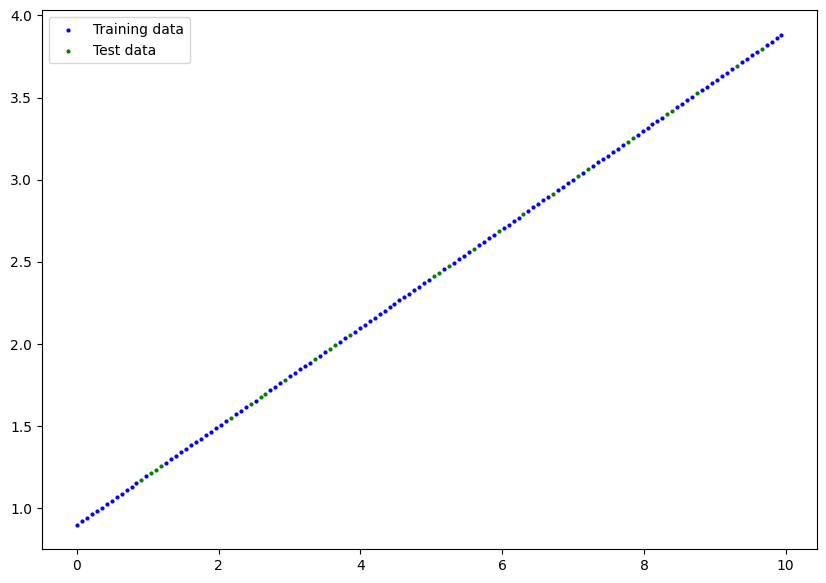

In [244]:
plot_points()

In [245]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight*x+self.bias

In [246]:
torch.manual_seed(42)
model_0 = LinearRegressionModel().to(device)
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823], device='cuda:0')),
             ('bias', tensor([0.9150], device='cuda:0'))])

In [247]:
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [248]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

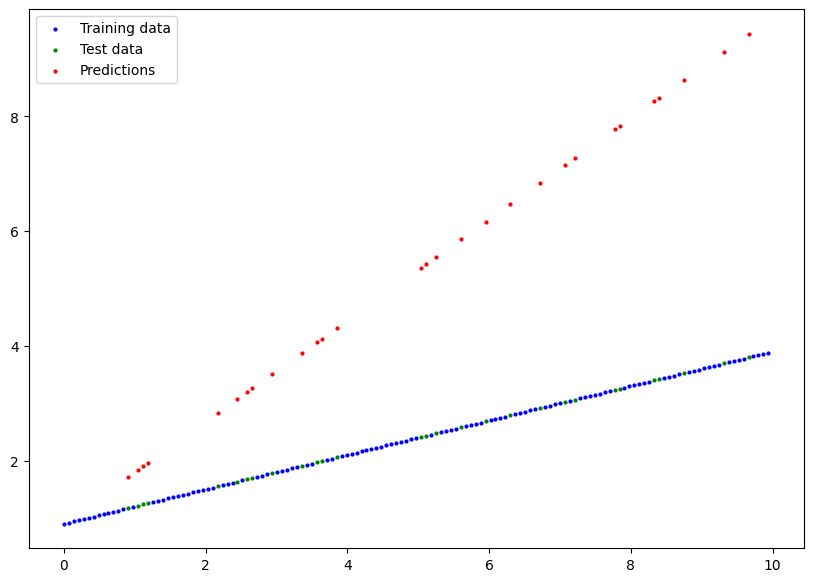

In [249]:
model_0.eval()
with torch.inference_mode():
  test_pred = model_0(X_test)
plot_points(predictions=test_pred.cpu())

In [250]:
epoch_counts=[]
train_losses = []
test_losses = []
epochs = 300
for epoch in range(epochs):
  model_0.train()

  pred_0 = model_0(X_train)

  loss = loss_fn(pred_0, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch%20==0:
    model_0.eval()

    with torch.inference_mode():
      pred_1 = model_0(X_test)

      test_loss = loss_fn(pred_1, y_test)

    epoch_counts.append(epoch)
    train_losses.append(loss)
    test_losses.append(test_loss)
    print(f"Epoch: {epoch} | train_loss: {loss:.4f} | test_loss: {test_loss:.4f}")


Epoch: 0 | train_loss: 2.9003 | test_loss: 2.6835
Epoch: 20 | train_loss: 0.0562 | test_loss: 0.2065
Epoch: 40 | train_loss: 0.0738 | test_loss: 0.1852
Epoch: 60 | train_loss: 0.0240 | test_loss: 0.2353
Epoch: 80 | train_loss: 0.0880 | test_loss: 0.1702
Epoch: 100 | train_loss: 0.0754 | test_loss: 0.1829
Epoch: 120 | train_loss: 0.0704 | test_loss: 0.1879
Epoch: 140 | train_loss: 0.0686 | test_loss: 0.1897
Epoch: 160 | train_loss: 0.0679 | test_loss: 0.1904
Epoch: 180 | train_loss: 0.0679 | test_loss: 0.1904
Epoch: 200 | train_loss: 0.0679 | test_loss: 0.1904
Epoch: 220 | train_loss: 0.0679 | test_loss: 0.1904
Epoch: 240 | train_loss: 0.0679 | test_loss: 0.1904
Epoch: 260 | train_loss: 0.0679 | test_loss: 0.1904
Epoch: 280 | train_loss: 0.0679 | test_loss: 0.1904


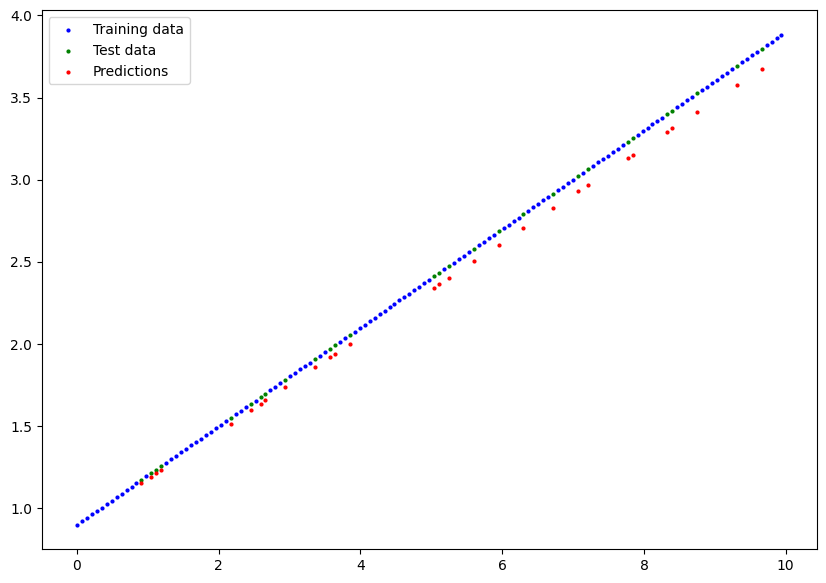

In [251]:
model_0.eval()
with torch.inference_mode():
  test_pred = model_0(X_test)
plot_points(predictions=test_pred.cpu())

In [252]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.2883], device='cuda:0')),
             ('bias', tensor([0.8901], device='cuda:0'))])

In [253]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "pytorch_excercise2_model.pth"
SAVE_MODEL_PATH = MODEL_PATH / MODEL_NAME

SAVE_MODEL_PATH

PosixPath('models/pytorch_excercise2_model.pth')

In [254]:
torch.save(obj=model_0.state_dict(), f=SAVE_MODEL_PATH)

In [255]:
torch.manual_seed(42)
model_1 = LinearRegressionModel().to(device)
model_1.state_dict()

OrderedDict([('weight', tensor([0.8823], device='cuda:0')),
             ('bias', tensor([0.9150], device='cuda:0'))])

In [256]:
model_1.load_state_dict(torch.load(f=SAVE_MODEL_PATH))

<All keys matched successfully>

In [257]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.2883], device='cuda:0')),
             ('bias', tensor([0.8901], device='cuda:0'))])

In [258]:
model_1.eval()
with torch.inference_mode():

  test_pred_2  = model_1(X_test)

test_pred == test_pred_2

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True], device='cuda:0')

In [259]:
def plot_losses(model):
  plt.figure(figsize=(10,7))
  plt.plot(epoch_counts, np.array(torch.Tensor(train_losses).cpu().numpy()), label="Train Loss")
  plt.plot(epoch_counts, np.array(torch.Tensor(test_losses).cpu().numpy()), label="Test Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

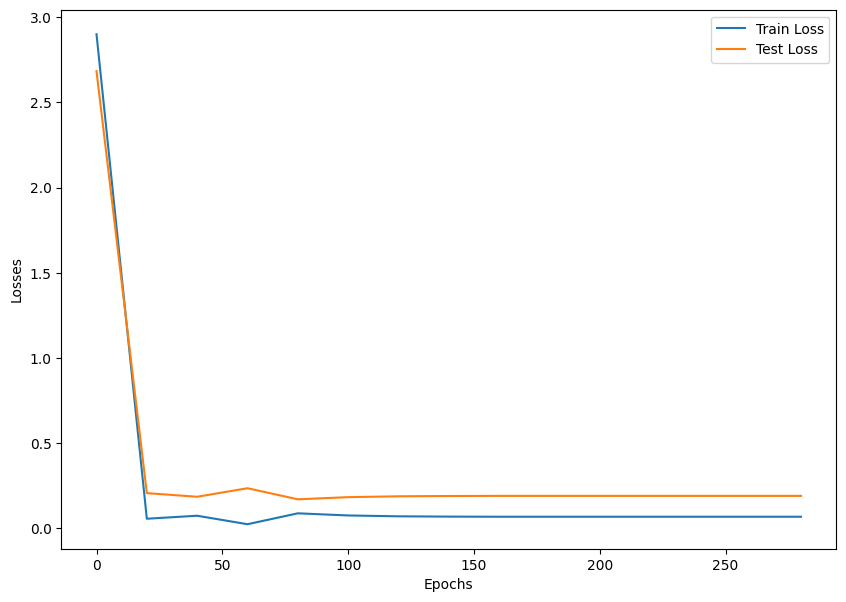

In [260]:
plot_losses(model_0)